In [ ]:
# 라이브러리 로드
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os
from collections import Counter
# import warnings
# warnings.filterwarnings('ignore')

# plt 세팅
plt.style.use('seaborn-whitegrid')
plt.rc('font', family='Malgun Gothic')  # 한글 폰트 설정
plt.rc('axes', unicode_minus=False)  # 마이너스 기호 깨짐 방지

C:\Users\hojin\AppData\Local\Temp\ipykernel_30364\1349006139.py:13: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [2]:
try:
    # 파일 경로 설정 (현재 디렉토리에 파일이 있다고 가정)
    file_path = 'E:\OneDrive\Soongsil Univ\Class\졸업작품\code\dataset\경기_202412.csv'
    
    # CSV 파일 읽기
    df = pd.read_csv(file_path, encoding='utf-8')

    # 필요한 컬럼만 선택
    df_selected = df[['상가업소번호', '상호명', '상권업종소분류명']].copy()
    
    # 결측치 확인
    print("결측치 개수:")
    missing_values = df_selected.isnull().sum()
    print(missing_values)

    # 결측치 제거
    df_clean = df_selected.dropna(subset=['상호명', '상권업종소분류명'])
    print(f"결측치 제거 후 데이터 크기: {df_clean.shape}")
    
    print(f"데이터 크기: {df_clean.shape}")
    print("\n처음 5개 행:")
    print(df_clean.head())
    
except FileNotFoundError:
    print(f"파일을 찾을 수 없습니다: {file_path}")

C:\Users\hojin\AppData\Local\Temp\ipykernel_30364\731131562.py:6: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, encoding='utf-8')


결측치 개수:
상가업소번호      0
상호명         0
상권업종소분류명    0
dtype: int64
결측치 제거 후 데이터 크기: (672885, 3)
데이터 크기: (672885, 3)

처음 5개 행:
                 상가업소번호       상호명     상권업종소분류명
0  MA010120220800000037    PENIEL   시계/귀금속 소매업
1  MA010120220800000124      계림찜닭  닭/오리고기 구이/찜
2  MA010120220800000126    한마음부동산   부동산 중개/대리업
3  MA010120220800000165   미사리풀하우스    돼지고기 구이/찜
4  MA010120220800000176  아름다운보석세상   시계/귀금속 소매업


In [3]:
print("\n컬럼 목록:")
for i, col in enumerate(df_clean.columns, 1):
    print(f"{i}. {col}")



컬럼 목록:
1. 상가업소번호
2. 상호명
3. 상권업종소분류명


In [4]:
# 상호명 정규화 함수 정의
def normalize_store_name(name):
    if pd.isna(name):
        return ""
    # 한글, 영문, 숫자만 남기고 나머지는 공백으로 변환
    cleaned = re.sub(r'[^가-힣a-zA-Z0-9]', ' ', str(name))
    # 연속된 공백 제거
    cleaned = re.sub(r'\s+', ' ', cleaned).strip()
    return cleaned

# 상호명 정규화 적용
df_clean['정규화_상호명'] = df_clean['상호명'].apply(normalize_store_name)

# 결과 확인
print("\n상호명 정규화 결과 (처음 10개):")
comparison = df_clean[['상호명', '정규화_상호명']].head(10)
print("원본 \t\t\t 정규화")
for i, row in comparison.iterrows():
    print(f"'{row['상호명']}'\t\t'{row['정규화_상호명']}'")


상호명 정규화 결과 (처음 10개):
원본 			 정규화
'PENIEL'		'PENIEL'
'계림찜닭'		'계림찜닭'
'한마음부동산'		'한마음부동산'
'미사리풀하우스'		'미사리풀하우스'
'아름다운보석세상'		'아름다운보석세상'
'금밭'		'금밭'
'빈체로'		'빈체로'
'골드마운틴'		'골드마운틴'
'3.3삼겹살'		'3 3삼겹살'
'신일산아크릴'		'신일산아크릴'


In [5]:
# 상호명 중복 분석
store_name_counts = df_clean['상호명'].value_counts()
duplicated_names = store_name_counts[store_name_counts > 1]

print(f"\n중복된 상호명 수: {len(duplicated_names)}")
print(f"전체 상호명 중 중복 비율: {len(duplicated_names) / len(store_name_counts):.2%}")

# 상위 20개 중복 상호명 확인
print("\n가장 많이 중복된 상호명 (상위 20개):")
print(duplicated_names.head(20))


중복된 상호명 수: 61839
전체 상호명 중 중복 비율: 12.22%

가장 많이 중복된 상호명 (상위 20개):
컴퓨터수리          646
입주청소           472
스타벅스           468
입시·교과학원        357
김밥천국           228
업소명없음          226
경영 컨설팅업        206
크린토피아          159
현대공인중개사사무소     152
삼성공인중개사사무소     141
투다리            138
우리공인중개사사무소     130
태후사랑           130
비주거용 건물 임대업    127
처갓집양념치킨        117
아모레카운셀러        116
아지트            116
파리바게뜨          112
이삭토스트          111
피자스쿨           107
Name: 상호명, dtype: int64


In [6]:
# 중복 상호명의 업종 분포 확인 (상위 5개만)
print("\n상위 5개 중복 상호명의 업종 분포:")
for name in duplicated_names.index[:5]:
    categories = df_clean[df_clean['상호명'] == name]['상권업종소분류명'].value_counts()
    print(f"\n'{name}' 업종 분포:")
    print(categories)


상위 5개 중복 상호명의 업종 분포:

'컴퓨터수리' 업종 분포:
컴퓨터/노트북/프린터 수리업       622
가전제품 수리업               11
컴퓨터/소프트웨어 소매업          11
핸드폰 소매업                 1
그 외 기타 개인/가정용품 수리업      1
Name: 상권업종소분류명, dtype: int64

'입주청소' 업종 분포:
건축물 일반 청소업               456
사업시설 유지·관리 서비스업           11
산업설비; 운송장비 및 공공장소 청소업      5
Name: 상권업종소분류명, dtype: int64

'스타벅스' 업종 분포:
카페    468
Name: 상권업종소분류명, dtype: int64

'입시·교과학원' 업종 분포:
입시·교과학원    357
Name: 상권업종소분류명, dtype: int64

'김밥천국' 업종 분포:
김밥/만두/분식    228
Name: 상권업종소분류명, dtype: int64


In [7]:
# 중복 상호명 처리 함수
def process_duplicate_names(df):
    """
    중복 상호명을 다음 전략으로 처리:
    1. 완전히 동일한 정규화 상호명은 가장 많은 업종으로 통합
    2. 업종 분포가 한 개인 경우 하나의 레코드만 유지
    """
    print(f"처리 전 데이터 크기: {df.shape}")
    
    # 중복 상호명 수집
    duplicated_names = df['정규화_상호명'].value_counts()
    duplicates = duplicated_names[duplicated_names > 1].index.tolist()
    
    # 결과 저장을 위한 리스트
    unique_records = []
    
    # 중복이 아닌 레코드는 그대로 유지
    non_duplicates = df[~df['정규화_상호명'].isin(duplicates)].copy()
    
    # 중복 상호명 처리
    processed_count = 0
    
    for name in duplicates:
        # 해당 상호명의 모든 레코드
        name_records = df[df['정규화_상호명'] == name]
        
        # 업종 분포 확인
        category_counts = name_records['상권업종소분류명'].value_counts()
        
        # 업종이 하나뿐인 경우
        if len(category_counts) == 1:
            # 첫 번째 레코드만 선택
            unique_records.append(name_records.iloc[0].to_dict())
            processed_count += len(name_records) - 1
        
        # 여러 업종이 있는 경우
        else:
            # 가장 많은 업종 선택
            most_common_category = category_counts.index[0]
            
            # 가장 많은 업종의 첫 번째 레코드 선택
            most_common_record = name_records[name_records['상권업종소분류명'] == most_common_category].iloc[0]
            unique_records.append(most_common_record.to_dict())
            
            # 다른 변형이 있는지 확인 (정규화 전 상호명이 다른 경우)
            original_names = name_records['상호명'].unique()
            
            # 정규화 전 상호명이 여러 개인 경우, 각각 추가
            if len(original_names) > 1:
                for orig_name in original_names[1:]:
                    # 정규화 이전의 원본 상호명이 다른 경우만 추가
                    orig_records = name_records[name_records['상호명'] == orig_name]
                    
                    if not orig_records.empty and orig_name != most_common_record['상호명']:
                        # 해당 원본 상호명에서 가장 많은 업종 선택
                        orig_category_counts = orig_records['상권업종소분류명'].value_counts()
                        orig_most_common_category = orig_category_counts.index[0]
                        
                        # 첫 번째 레코드 선택
                        orig_record = orig_records[orig_records['상권업종소분류명'] == orig_most_common_category].iloc[0]
                        unique_records.append(orig_record.to_dict())
            
            processed_count += len(name_records) - len(original_names)
    
    # 중복이 아닌 레코드와 처리된 중복 레코드 결합
    result_df = pd.concat([non_duplicates, pd.DataFrame(unique_records)], ignore_index=True)
    
    print(f"처리 후 데이터 크기: {result_df.shape}")
    print(f"제거된 중복 레코드 수: {processed_count}")
    print(f"데이터 감소율: {processed_count / len(df):.2%}")
    
    return result_df

In [8]:
# 중복 상호명 처리 적용
processed_df = process_duplicate_names(df_clean)

처리 전 데이터 크기: (672885, 4)
처리 후 데이터 크기: (505592, 4)
제거된 중복 레코드 수: 167267
데이터 감소율: 24.86%


In [9]:
# 특정 상호명으로 처리 결과 확인
def check_processing_results(original_df, processed_df, sample_names):
    """특정 상호명들에 대한 처리 결과를 확인합니다."""
    for name in sample_names:
        print(f"\n'{name}' 처리 결과:")
        
        # 원본 데이터에서 해당 상호명 검색
        original_records = original_df[original_df['정규화_상호명'] == name.lower()]
        print(f"원본 데이터 레코드 수: {len(original_records)}")
        
        if not original_records.empty:
            print("원본 업종 분포:")
            print(original_records['상권업종소분류명'].value_counts())
        
        # 처리된 데이터에서 해당 상호명 검색
        processed_records = processed_df[processed_df['정규화_상호명'] == name.lower()]
        print(f"처리 후 레코드 수: {len(processed_records)}")
        
        if not processed_records.empty:
            print("처리 후 업종 분포:")
            print(processed_records['상권업종소분류명'].value_counts())
            print("\n처리된 레코드:")
            print(processed_records[['상호명', '정규화_상호명', '상권업종소분류명']])

# 확인할 상호명 샘플 (데이터에 있는 상호명으로 변경 필요)
sample_names = duplicated_names.index[:5].tolist()  # 상위 5개 중복 상호명

# 처리 결과 확인
check_processing_results(df_clean, processed_df, sample_names)



'컴퓨터수리' 처리 결과:
원본 데이터 레코드 수: 646
원본 업종 분포:
컴퓨터/노트북/프린터 수리업       622
가전제품 수리업               11
컴퓨터/소프트웨어 소매업          11
핸드폰 소매업                 1
그 외 기타 개인/가정용품 수리업      1
Name: 상권업종소분류명, dtype: int64
처리 후 레코드 수: 1
처리 후 업종 분포:
컴퓨터/노트북/프린터 수리업    1
Name: 상권업종소분류명, dtype: int64

처리된 레코드:
          상호명 정규화_상호명         상권업종소분류명
443350  컴퓨터수리   컴퓨터수리  컴퓨터/노트북/프린터 수리업

'입주청소' 처리 결과:
원본 데이터 레코드 수: 472
원본 업종 분포:
건축물 일반 청소업               456
사업시설 유지·관리 서비스업           11
산업설비; 운송장비 및 공공장소 청소업      5
Name: 상권업종소분류명, dtype: int64
처리 후 레코드 수: 1
처리 후 업종 분포:
건축물 일반 청소업    1
Name: 상권업종소분류명, dtype: int64

처리된 레코드:
         상호명 정규화_상호명    상권업종소분류명
443351  입주청소    입주청소  건축물 일반 청소업

'스타벅스' 처리 결과:
원본 데이터 레코드 수: 468
원본 업종 분포:
카페    468
Name: 상권업종소분류명, dtype: int64
처리 후 레코드 수: 1
처리 후 업종 분포:
카페    1
Name: 상권업종소분류명, dtype: int64

처리된 레코드:
         상호명 정규화_상호명 상권업종소분류명
443352  스타벅스    스타벅스       카페

'입시·교과학원' 처리 결과:
원본 데이터 레코드 수: 0
처리 후 레코드 수: 0

'김밥천국' 처리 결과:
원본 데이터 레코드 수: 228
원본 업종 분포:
김밥/만두/분식    228
Name:

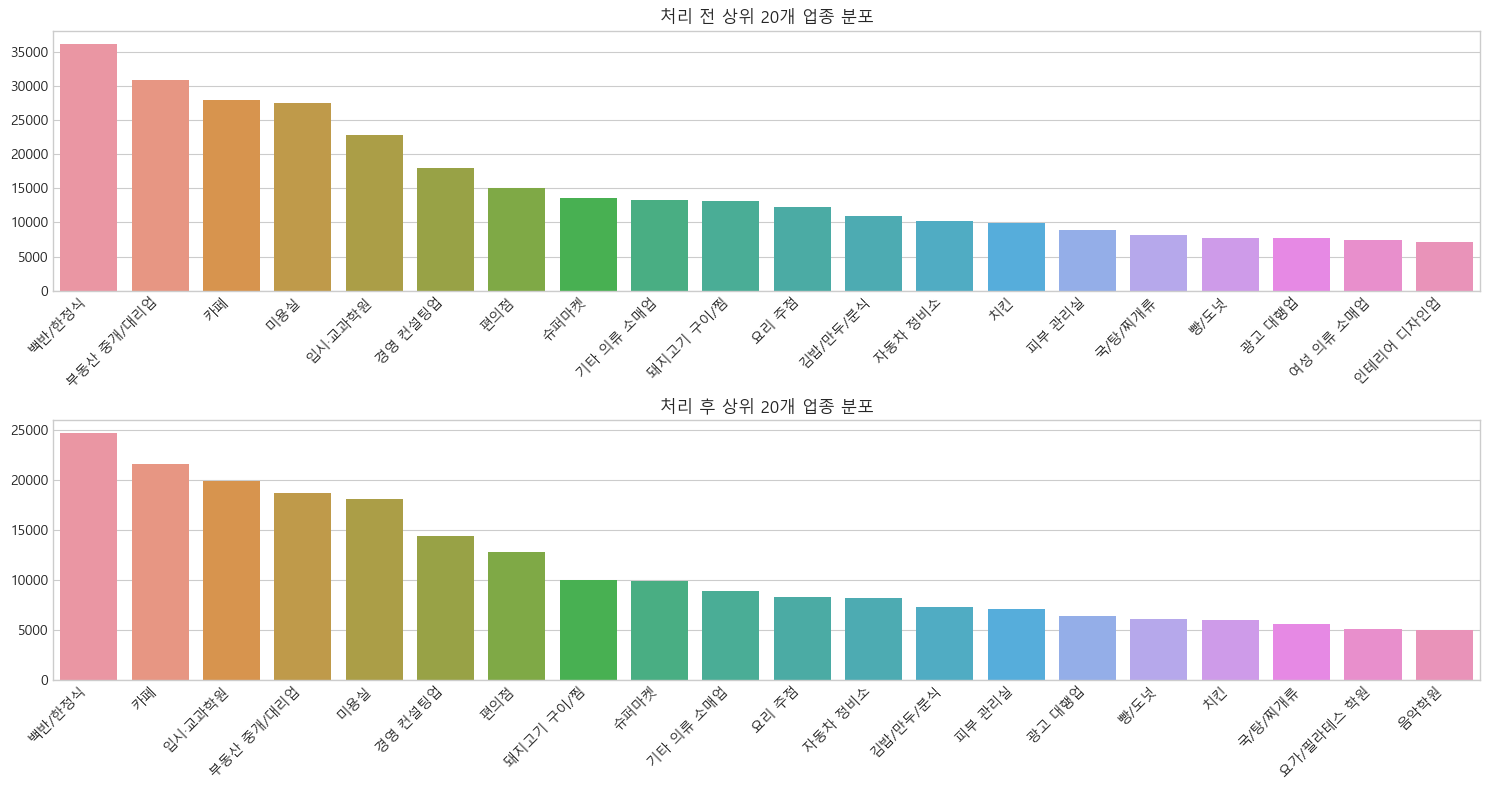

In [10]:
# 처리 전후 업종 분포 비교
original_categories = df_clean['상권업종소분류명'].value_counts()
processed_categories = processed_df['상권업종소분류명'].value_counts()

# 상위 20개 업종만 시각화
plt.figure(figsize=(15, 8))

# 원본 데이터 업종 분포
plt.subplot(2, 1, 1)
sns.barplot(x=original_categories.head(20).index, y=original_categories.head(20).values)
plt.title('처리 전 상위 20개 업종 분포')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# 처리 후 데이터 업종 분포
plt.subplot(2, 1, 2)
sns.barplot(x=processed_categories.head(20).index, y=processed_categories.head(20).values)
plt.title('처리 후 상위 20개 업종 분포')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.subplots_adjust(hspace=0.5)
plt.show()

In [11]:
# 최종 데이터셋 준비
final_df = processed_df[['상가업소번호', '상호명', '정규화_상호명', '상권업종소분류명']]

# 데이터 저장 디렉토리 생성
output_dir = './processed_data'
os.makedirs(output_dir, exist_ok=True)

# CSV 파일로 저장
output_path = f"{output_dir}/processed_store_data_no_duplicates.csv"
final_df.to_csv(output_path, index=False, encoding='utf-8')

print(f"\n중복 제거된 데이터가 저장되었습니다: {output_path}")
print(f"최종 데이터 크기: {final_df.shape}")


중복 제거된 데이터가 저장되었습니다: ./processed_data/processed_store_data_no_duplicates.csv
최종 데이터 크기: (505592, 4)



상호명 길이 통계:
              상호명_길이     정규화_상호명_길이
count  672885.000000  672885.000000
mean        6.250307       6.247567
std         2.981709       2.980948
min         1.000000       0.000000
25%         4.000000       4.000000
50%         6.000000       6.000000
75%         8.000000       8.000000
max        51.000000      51.000000


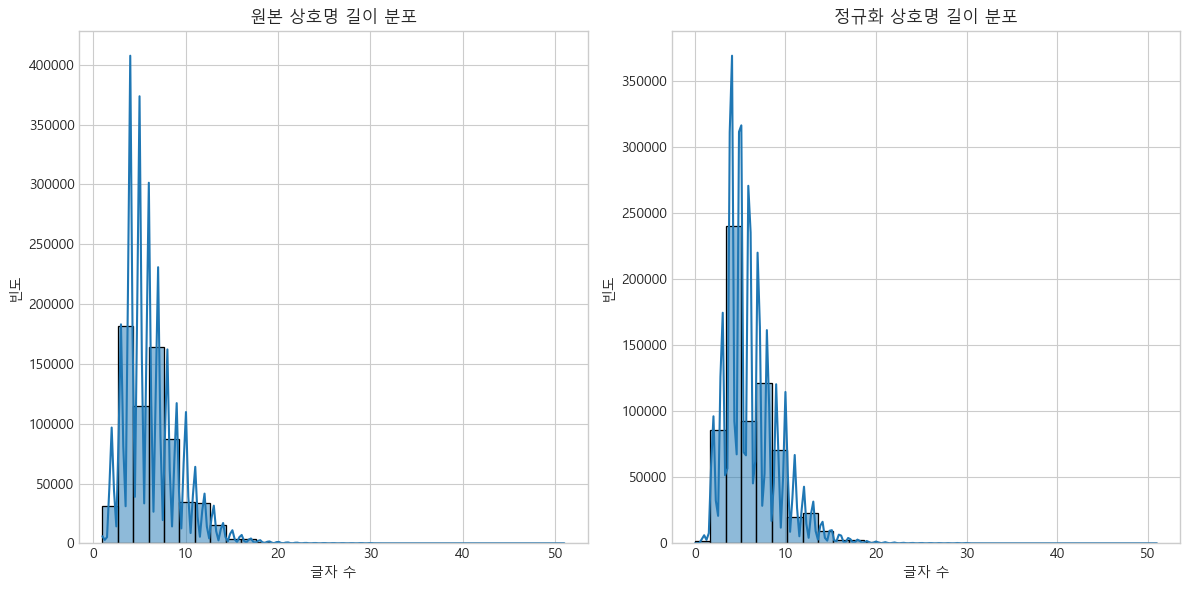

In [38]:
# 상호명 길이 분포
df_clean['상호명_길이'] = df_clean['상호명'].apply(len)
df_clean['정규화_상호명_길이'] = df_clean['정규화_상호명'].apply(len)

# 길이 통계
print("\n상호명 길이 통계:")
print(df_clean[['상호명_길이', '정규화_상호명_길이']].describe())

# 상호명 길이 분포 시각화
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df_clean['상호명_길이'], bins=30, kde=True)
plt.title('원본 상호명 길이 분포')
plt.xlabel('글자 수')
plt.ylabel('빈도')

plt.subplot(1, 2, 2)
sns.histplot(df_clean['정규화_상호명_길이'], bins=30, kde=True)
plt.title('정규화 상호명 길이 분포')
plt.xlabel('글자 수')
plt.ylabel('빈도')

plt.tight_layout()
plt.show()

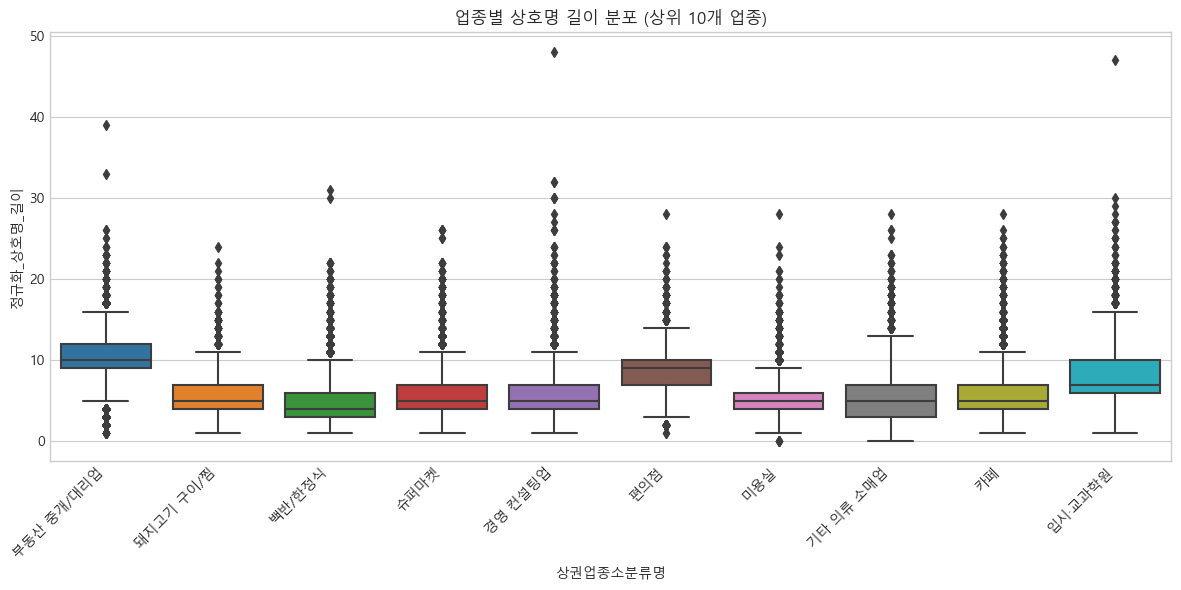

In [41]:
# 업종별 상호명 길이 분석 (상위 10개 업종)
top_categories = category_counts.head(10).index.tolist()
plt.figure(figsize=(12, 6))
sns.boxplot(x='상권업종소분류명', y='정규화_상호명_길이', 
           data=df_clean[df_clean['상권업종소분류명'].isin(top_categories)])
plt.title('업종별 상호명 길이 분포 (상위 10개 업종)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [42]:
# 최종 데이터셋 준비 (필요한 컬럼만 선택)
final_df = df_clean[['상가업소번호', '상호명', '정규화_상호명', '상권업종소분류명']]

# 데이터 저장 디렉토리 생성
output_dir = './processed_data'
os.makedirs(output_dir, exist_ok=True)

# CSV 파일로 저장
output_path = f"{output_dir}/processed_store_data.csv"
final_df.to_csv(output_path, index=False, encoding='utf-8')

print(f"\n가공된 데이터가 저장되었습니다: {output_path}")
print(f"데이터 크기: {final_df.shape}")



가공된 데이터가 저장되었습니다: ./processed_data/processed_store_data.csv
데이터 크기: (672885, 4)


In [44]:
# 전체 데이터 요약
print("\n=== 데이터 전처리 요약 ===")
print(f"총 데이터 건수: {len(df_clean):,}개")
print(f"고유 상호명 수: {len(df_clean['상호명'].unique()):,}개")
print(f"고유 업종 수: {len(df_clean['상권업종소분류명'].unique()):,}개")
print(f"가장 많은 업종: {category_counts.index[0]} ({category_counts.values[0]:,}개)")
print(f"가장 많이 중복된 상호명: {duplicated_names.index[0]} ({duplicated_names.values[0]:,}번 등장)")
print(f"상호명 평균 길이: {df_clean['상호명_길이'].mean():.1f}자")
print(f"정규화 상호명 평균 길이: {df_clean['정규화_상호명_길이'].mean():.1f}자")


=== 데이터 전처리 요약 ===
총 데이터 건수: 672,885개
고유 상호명 수: 505,849개
고유 업종 수: 247개
가장 많은 업종: 백반/한정식 (36,161개)
가장 많이 중복된 상호명: 컴퓨터수리 (646번 등장)
상호명 평균 길이: 6.3자
정규화 상호명 평균 길이: 6.2자
